In [76]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


torch.Size([3, 100, 100])


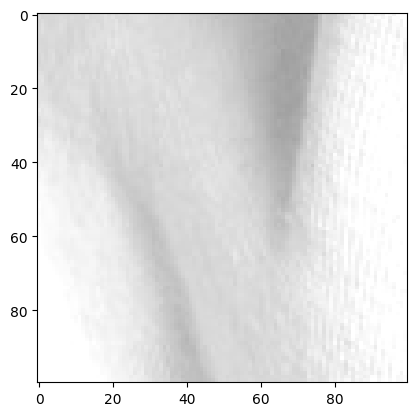

In [31]:
from data import get_img_transforms_train, get_img_transforms_train_target, BigImagesDataset,  get_img_transforms_test, get_img_transforms_test_target
import config.config as config
import matplotlib.pyplot as plt
from utils import convert_rgb_tensor_for_plot


train_transforms = get_img_transforms_train(100)
train_target_transforms = get_img_transforms_train_target(100)
ds_train = BigImagesDataset(str(config.TRAINING_IMGS_DIR), train_transforms, train_target_transforms)

in_img, target = ds_train[100]
plt.imshow(convert_rgb_tensor_for_plot(in_img))
print(ds_train[0][0].shape)

Image([[[0.4599, 0.4769, 0.4684,  ..., 0.2983, 0.3153, 0.3026],
        [0.4556, 0.4769, 0.4726,  ..., 0.3238, 0.3153, 0.3026],
        [0.4726, 0.4514, 0.4684,  ..., 0.3196, 0.3578, 0.2983],
        ...,
        [0.2473, 0.2516, 0.2558,  ..., 0.3196, 0.3578, 0.2941],
        [0.2686, 0.2558, 0.2516,  ..., 0.3451, 0.3408, 0.3281],
        [0.2643, 0.2601, 0.2558,  ..., 0.3408, 0.3408, 0.3238]]], )


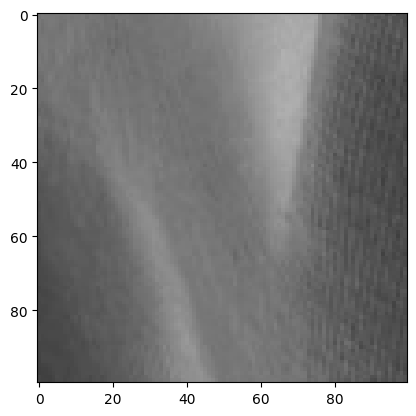

In [32]:
plt.imshow(target[0].detach().numpy(), cmap="gray", vmin=0, vmax=1)
print(target)


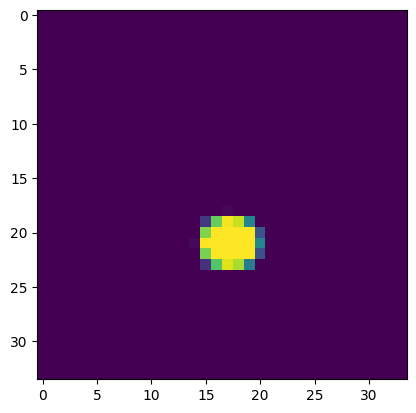

Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached
Failed to register: Timeout was reached


In [ ]:
from utils import load_transp_conv_weights
import config.config as config
import matplotlib.pyplot as plt
# print(load_transp_conv_weights(str(config.FONT_PATH), 34, config.TYPEWRITER_CONFIG["letterList"])[0][0])
convs = load_transp_conv_weights(str(config.FONT_PATH), 34, config.TYPEWRITER_CONFIG["letterList"])
plt.imshow(convs[0][0].numpy())


In [59]:
from models import NeuralNetwork
import config.config as config
import matplotlib.pyplot as plt

net = NeuralNetwork(str(config.FONT_PATH), 64, round(64*0.035), 1, config.TYPEWRITER_CONFIG["letterList"])



torch.Size([1, 1, 72, 72])
torch.Size([1, 100, 5, 5])
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000]],

        ...,

        [[0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        

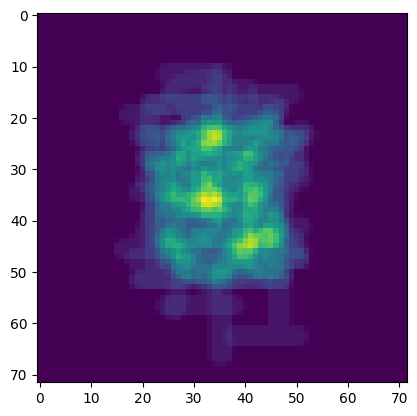

In [60]:
import torch

test_input = torch.randn(1, 3, 10, 10)
output, type_hits = net(test_input)
plt.imshow(output.detach().numpy()[0][0])
print(output.shape)
print(type_hits.shape)
print(type_hits[0][:])

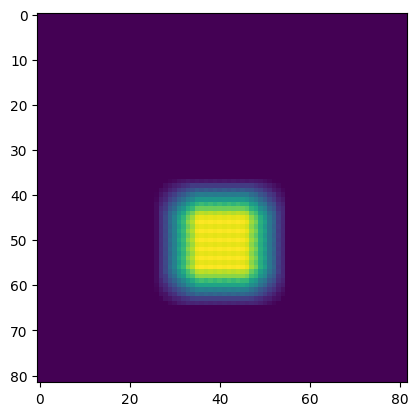

In [61]:
input_tensor = torch.zeros(1, 100, 10, 10)
input_tensor[0][0][:] = 0.5

output_transp = net.transp_conv(input_tensor)
plt.imshow(output_transp.detach().numpy()[0][0])

In [ ]:
from utils import TypeRLoss

loss = TypeRLoss(5, 1, 0.1, )